In [21]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [22]:
MUTAG = Dataset("MUTAG")

In [23]:
VH = VertexHistogram()
VH_kmeans = Model(VH, MUTAG, "kmeans")
VH_SVM = Model(VH, MUTAG, "SVM")
VH_xgboost = Model(VH, MUTAG, "xgboost")

In [24]:
VH_kmeans.evaluate()
VH_SVM.evaluate()
VH_xgboost.evaluate()

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.88      0.81      0.84        26

    accuracy                           0.79        38
   macro avg       0.76      0.78      0.77        38
weighted avg       0.80      0.79      0.79        38

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.88      0.81      0.84        26

    accuracy                           0.79        38
   macro avg       0.76      0.78      0.77        38
weighted avg       0.80      0.79      0.79        38

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.88      0.88      0.88        26

    accuracy                           0.84        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.84      0.84      0.84        38



In [25]:
EH = EdgeHistogram()
EH_kmeans = Model(EH, MUTAG, "kmeans")
EH_SVM = Model(EH, MUTAG, "SVM")
EH_xgboost = Model(EH, MUTAG, "xgboost")

EH_kmeans.evaluate()
EH_SVM.evaluate()
EH_xgboost.evaluate()

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        12
           1       1.00      0.62      0.76        26

    accuracy                           0.74        38
   macro avg       0.77      0.81      0.73        38
weighted avg       0.86      0.74      0.74        38

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.85      0.88      0.87        26

    accuracy                           0.82        38
   macro avg       0.79      0.78      0.78        38
weighted avg       0.81      0.82      0.81        38

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.92      0.88      0.90        26

    accuracy                           0.87        38
   macro avg       0.84      0.86      0.85        38
weighted avg       0.87      0.87      0.87        38



In [26]:
SP = ShortestPath()

SP_kmeans = Model(SP, MUTAG, "kmeans")
SP_SVM = Model(SP, MUTAG, "SVM")
SP_xgboost = Model(SP, MUTAG, "xgboost")

SP_kmeans.evaluate()
SP_SVM.evaluate()
SP_xgboost.evaluate()

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        12
           1       1.00      0.54      0.70        26

    accuracy                           0.68        38
   macro avg       0.75      0.77      0.68        38
weighted avg       0.84      0.68      0.69        38

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.91      0.81      0.86        26

    accuracy                           0.82        38
   macro avg       0.79      0.82      0.80        38
weighted avg       0.84      0.82      0.82        38

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.79      0.85      0.81        26

    accuracy                           0.74        38
   macro avg       0.69      0.67      0.68        38
weighted avg       0.73      0.74      0.73        38



In [34]:
GL = Graphlet(k=5)

GL_kmeans = Model(GL, MUTAG, "kmeans")
GL_SVM = Model(GL, MUTAG, "SVM")
GL_xgboost = Model(GL, MUTAG, "xgboost")

GL_kmeans.evaluate()
GL_SVM.evaluate()
GL_xgboost.evaluate()

              precision    recall  f1-score   support

           0       0.48      0.92      0.63        12
           1       0.93      0.54      0.68        26

    accuracy                           0.66        38
   macro avg       0.71      0.73      0.66        38
weighted avg       0.79      0.66      0.67        38

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.80      0.92      0.86        26

    accuracy                           0.79        38
   macro avg       0.78      0.71      0.73        38
weighted avg       0.78      0.79      0.78        38

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.91      0.77      0.83        26

    accuracy                           0.79        38
   macro avg       0.77      0.80      0.77        38
weighted avg       0.82      0.79      0.80        38



In [37]:
GL_xgboost.explain()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


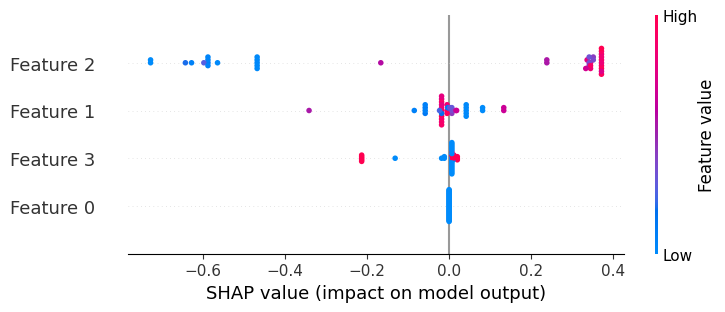

In [43]:
GL_xgboost.summary_plot()

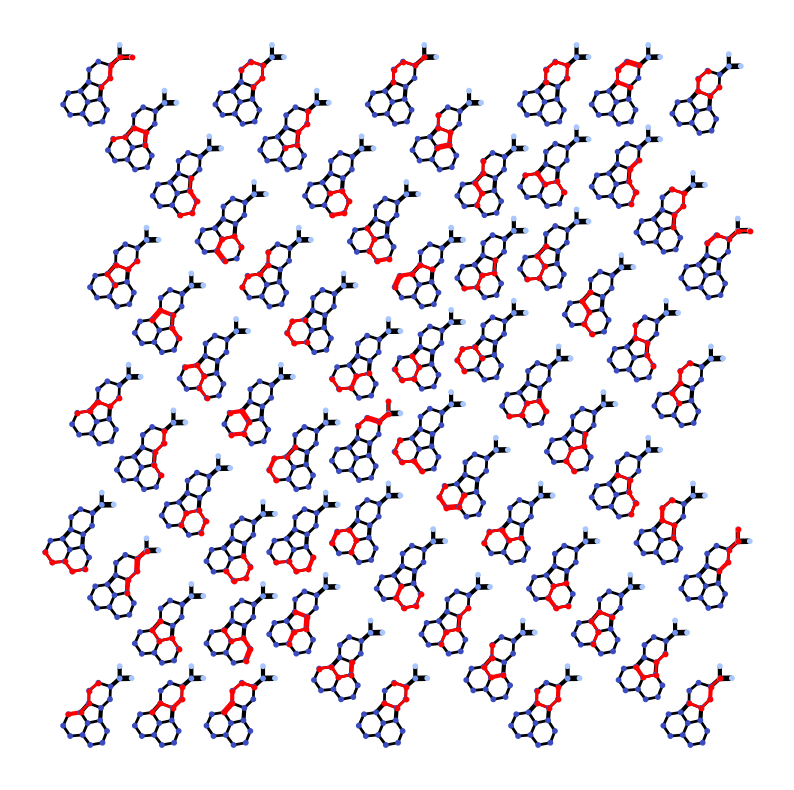

In [50]:
GL_xgboost.highlight_features(14,2,node_size=10)

In [52]:
print(SP_xgboost.dataset.readme)

README for dataset MUTAG


=== Usage ===

This folder contains the following comma separated text files 
(replace DS by the name of the dataset):

n = total number of nodes
m = total number of edges
N = number of graphs

(1) 	DS_A.txt (m lines) 
	sparse (block diagonal) adjacency matrix for all graphs,
	each line corresponds to (row, col) resp. (node_id, node_id)

(2) 	DS_graph_indicator.txt (n lines)
	column vector of graph identifiers for all nodes of all graphs,
	the value in the i-th line is the graph_id of the node with node_id i

(3) 	DS_graph_labels.txt (N lines) 
	class labels for all graphs in the dataset,
	the value in the i-th line is the class label of the graph with graph_id i

(4) 	DS_node_labels.txt (n lines)
	column vector of node labels,
	the value in the i-th line corresponds to the node with node_id i

There are OPTIONAL files if the respective information is available:

(5) 	DS_edge_labels.txt (m lines; same size as DS_A_sparse.txt)
	labels for the edges in DD_A_spa